In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Flatten,Conv1D,MaxPooling1D,Embedding,Dropout,LSTM
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
import re

In [37]:
data = pd.read_csv("Reviews.csv")

In [38]:
data = data[['Score','Text']]

In [39]:
data = data[:25000]

In [40]:
data.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


c:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

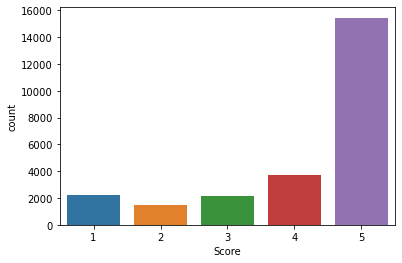

In [41]:
sns.countplot(data['Score'])

In [42]:
data['Score'] = data['Score'].apply(lambda x : 1 if x > 3 else 0)

c:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

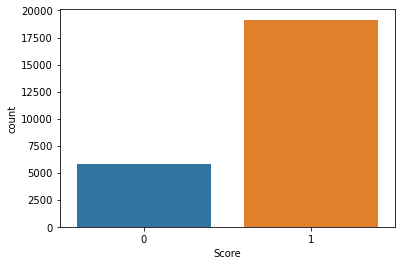

In [43]:
sns.countplot(data['Score'])

In [44]:
stop_words = stopwords.words("english")

In [45]:
def clean(text):
    text = text.lower()
    text = re.sub("[^A-Za-z0-9]"," ",text) # Remove Special Characters
    text = re.sub(r"[0-9]+"," ",text) # Remove Numbers
    text = " ".join(i for i in text.split() if i not in stop_words)
    return text

In [46]:
data['Cleaned'] = data['Text'].apply(lambda x:  clean(x))

In [47]:
data.head()

,Score,Text,Cleaned
0,1,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,0,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...
2,1,This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,0,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,1,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [48]:
img  = cloud = WordCloud().generate(" ".join(data['Cleaned'][:500].values))

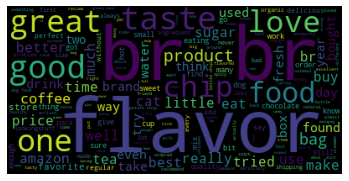

In [49]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [50]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(data['Cleaned'])
x = tokenizer.texts_to_sequences(data['Cleaned'])
x = pad_sequences(x,padding='post',truncating='post',maxlen=500)

In [51]:
x =  np.array(x)
y = np.array(data['Score'].values)

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [53]:
x_train = x_train[:10000]
y_train = y_train[:10000]

In [54]:
model = Sequential([
    Embedding(7000,32,input_length=500),
    Conv1D(32,3,activation='relu',padding='same'),
    MaxPooling1D(2),
    
    Conv1D(64,3,activation='relu'),
    MaxPooling1D(2),
    
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           224000    
                                                                 
 conv1d_2 (Conv1D)           (None, 500, 32)           3104      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 248, 64)           6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 124, 64)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7936)             

In [56]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [59]:
history  = model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
282/282 [==============================] - 10s 32ms/step - loss: 0.4852 - acc: 0.7810 - val_loss: 0.4449 - val_acc: 0.8160
Epoch 2/10
282/282 [==============================] - 9s 33ms/step - loss: 0.3734 - acc: 0.8332 - val_loss: 0.4267 - val_acc: 0.8100
Epoch 3/10
282/282 [==============================] - 9s 33ms/step - loss: 0.3316 - acc: 0.8561 - val_loss: 0.4432 - val_acc: 0.8200
Epoch 4/10
282/282 [==============================] - 9s 31ms/step - loss: 0.2884 - acc: 0.8791 - val_loss: 0.4283 - val_acc: 0.8170
Epoch 5/10
282/282 [==============================] - 9s 32ms/step - loss: 0.2225 - acc: 0.9104 - val_loss: 0.5337 - val_acc: 0.8120
Epoch 6/10
282/282 [==============================] - 10s 34ms/step - loss: 0.1516 - acc: 0.9430 - val_loss: 0.6239 - val_acc: 0.7990
Epoch 7/10
282/282 [==============================] - 9s 31ms/step - loss: 0.1051 - acc: 0.9611 - val_loss: 0.6664 - val_acc: 0.7830
Epoch 8/10
282/282 [==============================] - 9s 31ms/step 

In [60]:
loss,acc = model.evaluate(x_test,y_test)

79/79 [==============================] - 1s 7ms/step - loss: 1.1236 - acc: 0.8028


<AxesSubplot:title={'center':'acc'}>

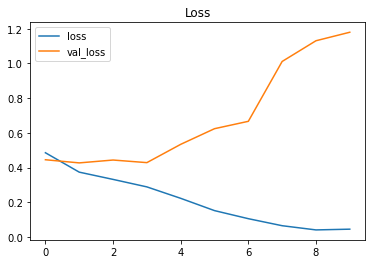

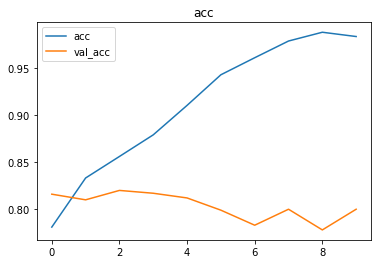

In [61]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(title='Loss')
history_df[['acc','val_acc']].plot(title='acc')

In [63]:
def predict(data):
    data = data.reshape(-1,data.shape[0])
    pred =  model.predict(data)
    return np.argmax(pred,axis=1)[0]

In [64]:
index = 6
print("Prediction : " ,predict(x_test[index]))
print("Actual Label : ",y_test[index])

1/1 [==============================] - 0s 152ms/step
Prediction :  0
Actual Label :  1


### Random Forest

In [65]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [66]:
model.score(x_test,y_test)

0.7748

### LinearSVC

In [67]:
model = LinearSVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

c:\Users\KIIT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.572

### SVC

In [68]:
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7676

### Logistic Regression

In [69]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)
model.score(x_test,y_test)

c:\Users\KIIT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7636

### GaussianNB

In [70]:
model = GaussianNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.234